# OhioHealth Data Analytics/Modeling Exercise
Submitted by Ali Haider
Date 11/02/2020
<br>
<br>



## Importing libraries and the data set

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from statistics import median
from scipy import stats



In [223]:
def read_csv(file_name):
    data = pd.read_csv(file_name, encoding = 'utf-8')
    
    # fix encoding related errors
    data.columns = [col.replace('\xa0', '') for col in data.columns]
    for col in data.columns:
        data[col] = data[col].astype(str).str.replace(u'\xa0', '')
        
    return data

In [224]:
#Sheet 'student1' of OH_dataset1
df1 = read_csv("student1.csv")
df1.head()

,Studentid,year,score
0,A,94,320
1,A,94,348
2,A,92,365
3,B,92,402
4,B,92,354


In [234]:
#Sheet 'student2' of OH_dataset1
df2 = read_csv("student2.csv")
df2.head()

,Studentid,Gender,Age,EconomicStatus
0,A,M,16,high
1,B,F,15,medium
2,C,F,18,high
3,D,M,16,low
4,E,M,16,high


In [235]:
#OH_dataset2 of excercise
df3 = read_csv("OH_dataset2.csv")
df3.head()

,Year,Month,TimeSeries
0,2012,1,13
1,2012,2,12
2,2012,3,11
3,2012,4,10
4,2012,5,9


<br><br>
### A.	Use dataset OH_dataset1.xlsx (note it contains two sheets) and create R/Python code to answer below questions.

### 1.	Write code to retrieve mean and median scores for each student ID?

In [689]:
list_dict_scores = []

#Finding list of unique studenID
list_studentID = list(df1["Studentid"])
list_studentID = set(list_studentID)
list_studentID = sorted(list_studentID)

#Make list of scores
for x in list_studentID:
    f =[]
    for i in range(df1.shape[0]):
        if x == list(df1['Studentid'])[i]:
            lst = list(df1['score'])[i]
            f.append(lst)
    r = {x: f}
    list_dict_scores.append(r)

    
#Make a list of mean and median 
list1 = []
for j in range(len(w)):
    letter_dict = list_dict_scores[j]
    values_list = list(letter_dict.values())
    values_list = values_list[0]
    values_list = [int(k) for k in values_list] 
    
    float_mean = statistics.mean(values_list)
    rounded_mean = round(float_mean, 1)
    
    float_median = median(values_list)
    
    mean_median_list = [rounded_mean, float_median]
    list1.append(mean_median_list)

#Convert into data frame    
Dict_mean_median = dict(zip(list_studentID, list1))   
Dict_mean_median = pd.DataFrame.from_dict(Dict_mean_median)
Dict_mean_median.index = ['Mean', 'Median']
Dict_mean_median

    
  

,A,B,C,D,E,F,G,H,I
Mean,344.3,367.8,415.3,350.5,494.0,347,422.7,369.2,420.7
Median,348.0,377.0,425.5,350.5,494.0,348,449.0,356.5,411.0


<br><br>
### 2.	Create a new binary variable named result, which indicates whether a student scored above 400?

In [237]:
#Print True if student's score is greater than 400 and false when it is not
df1['score'] = pd.to_numeric(df1['score'])
df = df1["score"] >= 400
df = pd.concat([df1['Studentid'], df], axis=1)
df

,Studentid,score
0,A,False
1,A,False
2,A,False
3,B,True
4,B,False
5,B,False
6,B,True
7,C,True
8,C,True
9,C,True


<br><br>
### 3.	Write code to find out the gender and age of each student ID?

In [401]:
pd.concat([df2['Studentid'], df2['Gender'], df2['Age']], axis=1, keys=['Studentid', 'Gender', 'Age'])

,Studentid,Gender,Age
0,A,M,16
1,B,F,15
2,C,F,18
3,D,M,16
4,E,M,16
5,F,M,15
6,G,F,16
7,H,M,16
8,I,F,17


<br><br>
### 4. Create a histogram to find out the distribution of score by gender? Is the distribution normal? 

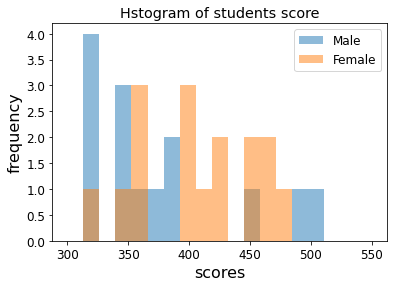

In [671]:
#Making list of male and female scores
Male_scores = []
Female_scores = []

for i in range(len(df1)):
    
    student_id_1 = list(df1['Studentid'])[i]
    
    for j in range(len(df2)):
        
        student_id_2 = list(df2['Studentid'])[j]
        student_gender_2 = list(df2['Gender'])[j]
        
        if  student_id_1 == student_id_2 and student_gender_2 == 'M': 
            Male_score = list(df1['score'])[i]
            Male_scores.append(Male_score)
        
        elif student_id_1 == student_id_2 and student_gender_2 == 'F':
            Female_score = list(df1['score'])[i]
            Female_scores.append(Female_score)
            
            
#Plotting the histogram           
x = Male_scores
y = Female_scores

bins = np.linspace(300, 550, 20)

plt.title("Hstogram of students score")
plt.hist(x, bins, alpha=0.5, label='Male')
plt.hist(y, bins, alpha=0.5, label='Female')
plt.legend(loc='upper right')
plt.xlabel('scores', fontsize=16)
plt.ylabel('frequency', fontsize=16)
plt.show() 


Distribution of Male scores is not normally distributed while female scores can be considered normally distributed due to the bell shape of the histogram.

<br><br>
### 5.	Is there any statistical difference between male and female scores?

In [292]:
#Statistical significance testing
t_check=stats.ttest_ind(Male_scores, Female_scores)
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('Male and Female scores are statisticaly different')
else:
    print('The difference in Male and Female scores is not statisticaly significant')

The difference in Male and Female scores is not statisticaly significant


<br><br>
### 6.For each student ID, what is the most recent score and which year was it?

In [373]:
#most recent score and year
df1['year'] = df1['year'].astype(int)

inDex = []
Recent_year_list = []

for j in range(len(df2)):
    recent_year = 0
    for i in range(len(df1)):

            student_id_1 = list(df1['Studentid'])[i]
            student_id_2 = list(df2['Studentid'])[j]
            student_year = list(df1['year'])[i]
        
            if  student_id_1 == student_id_2: 
                
                if recent_year < student_year:
                    recent_score = list(df1['score'])[i]
                    recent_year = max(recent_year, student_year)
                    index = i

    inDex.append(index)
    Recent_year_list.append(recent_year)
    

recent_score = []
for k in range(len(inDex)):
    recent_score.append(list(df1['score'])[inDex[k]])
    

student_recent_score_year = {'Studentid': list(df2['Studentid']), 'Recent_score': recent_score, \
                             'Recent_year': Recent_year_list}
df5 = pd.DataFrame(data=student_recent_score_year)
df5
    

,Studentid,Recent_score,Recent_year
0,A,320,94
1,B,402,92
2,C,480,94
3,D,380,95
4,E,499,94
5,F,379,95
6,G,462,94
7,H,450,95
8,I,401,92


<br><br>
### B.	Use dataset OH_dataset1.xlsx (note it contains two sheets) and create R/Python code to answer below questions. 

### 1.	How would you recode gender as a 0/1 binary indicator?

In [388]:
gender_bin = pd.get_dummies(df2.Gender, prefix='Gender')
gender_bin.drop(['Gender_M'], axis=1)

pd.concat([df2['Studentid'], df2['Gender'], gender_bin['Gender_F']], axis=1, keys=['Studentid', 'Gender', 'Gender_F'])


,Studentid,Gender,Gender_F
0,A,M,0
1,B,F,1
2,C,F,1
3,D,M,0
4,E,M,0
5,F,M,0
6,G,F,1
7,H,M,0
8,I,F,1


Its 0 for male and 1 for female

<br><br>
### 2.	Recode age as an ordinal variable using the following criteria:
##### a.	< 15 = 1
##### b.	15 – 18 (both inclusive) = 2
##### c.	> 18 = 3


In [404]:
Ordinal_variable_age = []
age_list = [int(i) for i in list(df2['Age'])] 

for i in range(len(df2['Age'])):
    
    if age_list[i] < 15:
        Ordinal_variable_age.append(1)

    elif age_list[i] >= 15 and age_list[i] <= 18:
        Ordinal_variable_age.append(2)
    else:
        Ordinal_variable_age.append(3)
        
categorical_age = {'Age group': Ordinal_variable_age}
categorical_age = pd.DataFrame(data= categorical_age)
categorical_age


pd.concat([df2['Studentid'], df2['Age'], categorical_age['Age group']], axis=1, keys=['Studentid', 'Age', 'Age group'])


,Studentid,Age,Age group
0,A,16,2
1,B,15,2
2,C,18,2
3,D,16,2
4,E,16,2
5,F,15,2
6,G,16,2
7,H,16,2
8,I,17,2


<br><br>
### 3.	Build a machine learning algorithm to predict student’s score using the other features. Use any model specification and data transformation you think is appropriate.

In [458]:
#Making the data structure

list_year = []
list_score = []
list_Gender = []
list_Age = []
list_economic = []
        
for i in range(len(df1)):
    for j in range(len(df2)):
        
        if list(df1['Studentid'])[i] == list(df2['Studentid'])[j]:
           list_year.append(list(df1['year'])[i])
           list_score.append(list(df1['score'])[i])
           list_Gender.append(list(df2['Gender'])[j])
           list_Age.append(list(df2['Age'])[j])
           list_economic.append(list(df2['EconomicStatus'])[j])
        
data_dict = {'Studentid': list(df1['Studentid']), 'year':  list_year, \
             'EconomicStatus': list_economic, 'Gender': list_Gender, 'Age': list_Age,  'score': list_score}

           
df6 = pd.DataFrame(data = data_dict)
df6.head()

,Studentid,year,EconomicStatus,Gender,Age,score
0,A,94,high,M,16,320
1,A,94,high,M,16,348
2,A,92,high,M,16,365
3,B,92,medium,F,15,402
4,B,92,medium,F,15,354


Since the details in questions are not given so I made two assumptions which are as follow- 
- We have to predict scores of a new student who is not in the given list
- The scores of each student are not the repition of a same course exam.

we can drop studentid column as it is not important for new student's score prediction

In [424]:
df6 = df6.drop(['Studentid'], axis=1)

Now we are all set and have to convert categorical columns into dummy variables.

In [438]:
#Making dummy variables of economic status columns
economic_bin = pd.get_dummies(df6.EconomicStatus, prefix='EconomicStatus')

#dropping medium column to prevent dummy variable trap
economic_bin = economic_bin[['EconomicStatus_high', 'EconomicStatus_low'] ]

#Making dummy variables of gender columns
gender_bin = pd.get_dummies(df6.Gender, prefix='Gender')

#dropping female column to prevent dummy variable trap
gender_bin = gender_bin[['Gender_M']]

#Concatenate all the columns
Data = pd.concat([df6['year'], economic_bin, gender_bin, df6['Age'], df6['score']], axis=1)
Data.head()

,year,EconomicStatus_high,EconomicStatus_low,Gender_M,Age,score
0,94,1,0,1,16,320
1,94,1,0,1,16,348
2,92,1,0,1,16,365
3,92,0,0,0,15,402
4,92,0,0,0,15,354


In [461]:
# Random Forest Regression

X = Data.iloc[:, 1:-1].values
y = Data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True, \
                                                    random_state=4)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
regressor.fit(X_train, y_train)

#Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

#Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 47.01613095238095
Mean Squared Error: 3832.81524606009
Root Mean Squared Error: 61.909734663137506


In [678]:
# Support Vector Machine
from sklearn.svm import SVC
regressor = SVC(kernel = 'linear', random_state =0)
regressor.fit(X_train, y_train)

#Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

#Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.25
Mean Squared Error: 0.25
Root Mean Squared Error: 0.5


The root mean squared error of random forest is less than that of SVM so we will chose random forest as our model.

The mean absolute error is 12% of the avergae score value. It has done a reasonably good job on our small dataset.

<br><br>
### 4.	Create a new binary variable named result, which indicates whether a student scored above 400. Build a machine learning algorithm using this new binary variable as response variable and other features as predictors. Use any model specification and data transformation you think is appropriate

In [484]:
#Print 1 if student's score is greater than 400 and 0 when it is not
df1['score'] = pd.to_numeric(df1['score'])
df = df1["score"] > 400

binary_score = []
for i in range(len(df)):
    if df[i] == True:
       binary_score.append(1)
    else:
       binary_score.append(0)

binary_score = {'Binary_score': binary_score}
binary_score = pd.DataFrame(data = binary_score)

Data = pd.concat([df6['year'], economic_bin, gender_bin, df6['Age'], binary_score], axis=1)
Data.head()
        

,year,EconomicStatus_high,EconomicStatus_low,Gender_M,Age,Binary_score
0,94,1,0,1,16,0
1,94,1,0,1,16,0
2,92,1,0,1,16,0
3,92,0,0,0,15,1
4,92,0,0,0,15,0


In [679]:
# Random Forest classification

X = Data.iloc[:, 1:-1].values
y = Data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True, \
                                                    random_state=4)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion matrix is")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy from random forest model is" ,accuracy_score(y_test, y_pred))


Confusion matrix is
[[2 1]
 [1 4]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.80      0.80      0.80         5

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

Accuracy from random forest model is 0.75


In [680]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

#Evaluating the Algorithm
print("Confusion matrix is")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy from random forest model is" ,accuracy_score(y_test, y_pred))

Confusion matrix is
[[3 0]
 [2 3]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8

Accuracy from random forest model is 0.75


Both Random forest and Support vector machine showed 75% accuracy on 25% test set.

<br><br>
### C. Use dataset, OH_dataset2.xlsx (note it’s a monthly time series dataset) and create R/Python code to answer below questions.            

### 1. Trend the series using a visualization plot. 

In [520]:
df3.head()

,Year,Month,TimeSeries
0,2012,1,13
1,2012,2,12
2,2012,3,11
3,2012,4,10
4,2012,5,9


In [539]:
# Concatinating Year and Month column 
Data_Time_series = df3['Year'] + '-' + df3['Month']
Data_Time_series = pd.DataFrame({'YearMonth':Data_Time_series})

Data_Time_series = pd.concat([Data_Time_series, df3['TimeSeries']], axis=1)
Data_Time_series.head()

,YearMonth,TimeSeries
0,2012-1,13
1,2012-2,12
2,2012-3,11
3,2012-4,10
4,2012-5,9


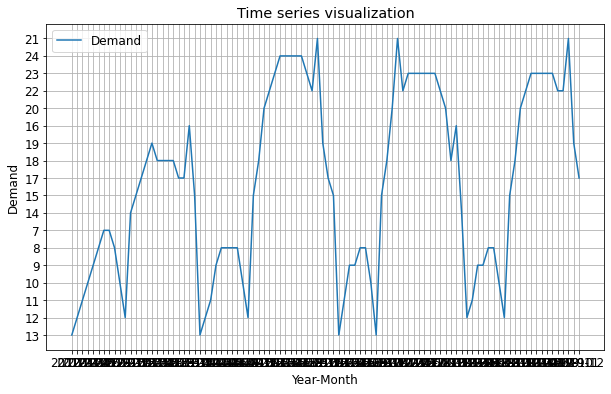

In [540]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(Data_Time_series.YearMonth, Data_Time_series.TimeSeries, color='tab:blue', label='Demand')

# Same as above
ax.set_xlabel('Year-Month')
ax.set_ylabel('Demand')
ax.set_title('Time series visualization')
ax.grid(True)
ax.legend(loc='upper left');


<br><br>
### 2.	Filter the level, trend and seasonality from the series

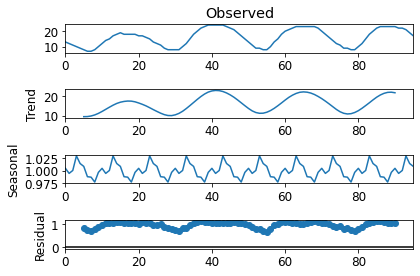

Level of the series or average is  16.0


In [588]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
df8 = Data_Time_series['TimeSeries']
df8 = df8.values
result = seasonal_decompose(df8, model='multiplicative', period=10)
result.plot()
pyplot.show()

df8 = df8.astype(np.float)
print("Level of the series or average is ", df8.mean()) 


<br><br>
### 3.	 Use the dataset and any time series model building technique to predict the monthly value for next the 12 months for 2020

<ipython-input-681-fe3b82c3b118>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


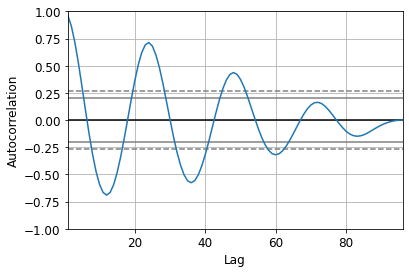

Hence we will chose a lag of 3


In [681]:
# Autocorellation plot
from pandas import datetime
from pandas.plotting import autocorrelation_plot

series = pd.Series(df8)
autocorrelation_plot(series)
plt.show()

print('Hence we will chose a lag of 3')

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   95
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -112.358
Method:                       css-mle   S.D. of innovations              0.784
Date:                Mon, 02 Nov 2020   AIC                            234.716
Time:                        19:31:07   BIC                            247.485
Sample:                             1   HQIC                           239.876
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0651      0.420     -0.155      0.877      -0.889       0.759
ar.L1.D.y      0.8067      0.098      8.202      0.000       0.614       0.999
ar.L2.D.y      0.2481      0.126      1.962      0.0

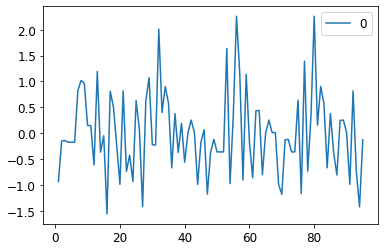

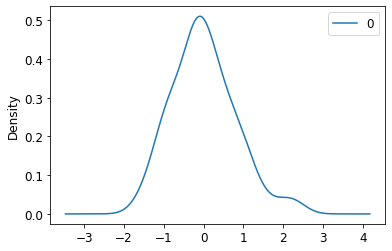

               0
count  95.000000
mean    0.004005
std     0.792183
min    -1.559591
25%    -0.491131
50%    -0.119798
75%     0.437128
max     2.260235


In [682]:
# ARIMA Forecasting
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
 
# fit model
model = ARIMA(series, order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())


Its good to understand the data while applying a model. Fom the graph we can see that the Errors are not centered. The distribution of the residual errors is displayed.The results show that indeed there is a slight bias in the prediction (a non-zero mean in the residuals).
<br>

predicted=22.494288, expected=23.000000
predicted=22.888132, expected=23.000000
predicted=22.597231, expected=23.000000
predicted=22.796899, expected=23.000000
predicted=22.710947, expected=23.000000
predicted=22.611069, expected=23.000000
predicted=23.057288, expected=22.000000
predicted=21.401094, expected=20.000000
predicted=18.434682, expected=18.000000
predicted=16.108357, expected=16.000000
predicted=13.936787, expected=14.000000
predicted=12.249132, expected=12.000000
predicted=10.648817, expected=11.000000
predicted=10.355641, expected=9.000000
predicted=7.869727, expected=9.000000
predicted=8.998038, expected=8.000000
predicted=8.040724, expected=8.000000
predicted=7.852205, expected=10.000000
predicted=11.932803, expected=12.000000
predicted=13.865628, expected=15.000000
predicted=18.164987, expected=18.000000
predicted=21.085890, expected=20.000000
predicted=21.775244, expected=22.000000
predicted=23.401709, expected=23.000000
predicted=23.332083, expected=23.000000
predicte

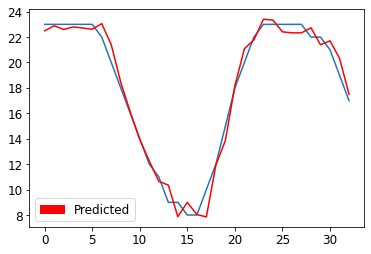

In [683]:
from sklearn.metrics import mean_squared_error
import matplotlib.patches as mpatches 
    
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    jobs = test[t]
    history.append(jobs)
    print('predicted=%f, expected=%f' % (yhat, jobs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
red_patch = mpatches.Patch(color='red', label='Predicted')
plt.legend(handles=[red_patch])
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()



Comparing test results on cross validation set allow us to validate the model. From the above analysis it looks like a good fit so we should move forward to predict for next 12 months

[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


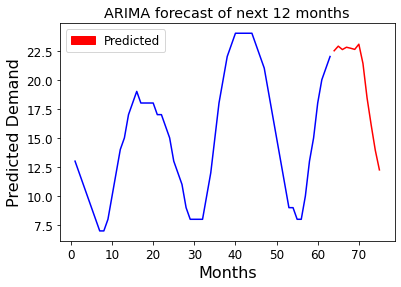

In [684]:
#Making predicitions of next 12 months
history = [x for x in train]
predictions = list()
for t in range(12):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    jobs = test[t]
    history.append(jobs)


    
x_train = []
for i in range(len(train)):
    x_train.append(i+1)
    
length_train = len(train)
length_predictions = len(predictions)
length_forecast = length_train + length_predictions
x_predictions =[]

for i in range(length_train, length_forecast):
    x_predictions.append(i+1)

print(x_predictions)
plt.plot(x_train, train, color='blue')
plt.plot(x_predictions, predictions, color='red')


plt.title("ARIMA forecast of next 12 months")
plt.xlabel('Months', fontsize=16)
plt.ylabel('Predicted Demand', fontsize=16)
red_patch = mpatches.Patch(color='red', label='Predicted')
plt.legend(handles=[red_patch])
plt.show()

<br><br>
#### Now using LSTM for time series

In [787]:
#LSTM for time series

test1 = test
train1 = train.reshape(-1, 1)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train1)

In [788]:
# Creating a data structure with 20 timesteps and 1 output
X_train = []
y_train = []
for i in range(20, len(train1)):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [789]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [790]:
#Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 500, batch_size = 5)

Epoch 1/500
9/9 [==============================] - 0s 32ms/step - loss: 0.2200
Epoch 2/500
9/9 [==============================] - 0s 22ms/step - loss: 0.1723
Epoch 3/500
9/9 [==============================] - 0s 36ms/step - loss: 0.1407
Epoch 4/500
9/9 [==============================] - 0s 50ms/step - loss: 0.1365
Epoch 5/500
9/9 [==============================] - 0s 31ms/step - loss: 0.1273
Epoch 6/500
9/9 [==============================] - 0s 29ms/step - loss: 0.1154
Epoch 7/500
9/9 [==============================] - 0s 32ms/step - loss: 0.1252
Epoch 8/500
9/9 [==============================] - 0s 37ms/step - loss: 0.1097
Epoch 9/500
9/9 [==============================] - 0s 28ms/step - loss: 0.0796
Epoch 10/500
9/9 [==============================] - 0s 37ms/step - loss: 0.0747
Epoch 11/500
9/9 [==============================] - 0s 37ms/step - loss: 0.0873
Epoch 12/500
9/9 [==============================] - 0s 29ms/step - loss: 0.0823
Epoch 13/500
9/9 [==============================]

In [791]:
# testing
test1 = test.reshape(-1, 1)

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = np.concatenate((train1, test1), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test1) - 20:] 
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)
X_test = []
for i in range(20, 20+ len(test1)):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#print(X_test.shape)
#X_test = X_test.reshape(-1, 1)

predicted_demand = regressor.predict(X_test)
predicted_demand = sc.inverse_transform(predicted_demand)


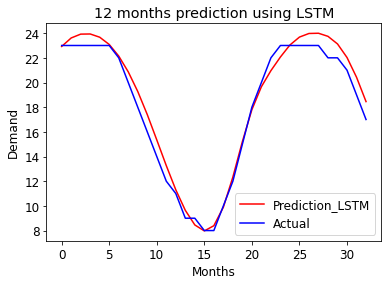

In [793]:
# Visualising the results
plt.plot(predicted_demand, color = 'red', label = 'Prediction_LSTM')
plt.plot(test1, color = 'blue', label = 'Actual')
plt.title('12 months prediction using LSTM')
plt.xlabel('Months')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [794]:
MSE = np.square(np.subtract(predicted_demand, test1)).mean() 
print("MSE from LSTM model is", MSE)

MSE from LSTM model is 0.7705398039637671


LSTM usally performs better than ARIMA but in this case we have small data and so MSE of ARIMA model was 0.61 which is better than 0.77 MSE of LSTM on test set. Using LSTM was like over killing the problem!